In [1]:
import re
import string
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
df = pd.read_excel("D:\\tweets_live.xlsx")

In [3]:
df

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,sentiment
0,@Palestine001_,2024-01-13T08:18:55.000Z,"The lions of #Yemen ,The Houthis .\n\nThey are...",78.0,135,303,29K,1.0
1,@stairwayto3dom,2024-01-13T13:23:13.000Z,"THE UK GOVERNMENT MIGHT NOT, BUT THE PEOPLE O...",12.0,54,116,1.2K,0.0
2,@TheEvanSur,2024-01-13T02:42:39.000Z,The entire globe stands in solidarity with Pal...,2.0,10,27,559,0.0
3,@Palestine001_,2024-01-13T10:58:01.000Z,May this baby and his family get to grow up in...,14.0,42,106,1.1K,1.0
4,@CaitlinScotland,2024-01-13T12:44:11.000Z,Impossible to show how many people are already...,1.0,51,90,1.1K,-1.0
5,@PalestineXcom,2024-01-13T13:08:04.000Z,"WHEN GOD IS ON YOUR SIDE, WHOLE WORLD CAN BE A...",NaN,3,11,135,1.0
6,@Sport4Palestine,2024-01-13T11:39:56.000Z,“We must recognise the position we're in as a...,2.0,55,186,4.5K,-1.0
7,@Muqadaam,2024-01-13T13:22:44.000Z,There are hundreds of thousands of us marching...,NaN,10,22,262,0.0
8,@RedactedRosalia,2024-01-13T11:17:52.000Z,"Look at the way, he looks at her that’s real t...",4.0,10,20,533,-1.0
9,@Muhamme03120906,2024-01-13T00:56:31.000Z,Pray for Palestine,25.0,494,953,49K,0.0


In [4]:
df.head()

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,sentiment
0,@Palestine001_,2024-01-13T08:18:55.000Z,"The lions of #Yemen ,The Houthis .\n\nThey are...",78.0,135,303,29K,1.0
1,@stairwayto3dom,2024-01-13T13:23:13.000Z,"THE UK GOVERNMENT MIGHT NOT, BUT THE PEOPLE O...",12.0,54,116,1.2K,0.0
2,@TheEvanSur,2024-01-13T02:42:39.000Z,The entire globe stands in solidarity with Pal...,2.0,10,27,559,0.0
3,@Palestine001_,2024-01-13T10:58:01.000Z,May this baby and his family get to grow up in...,14.0,42,106,1.1K,1.0
4,@CaitlinScotland,2024-01-13T12:44:11.000Z,Impossible to show how many people are already...,1.0,51,90,1.1K,-1.0


In [6]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
    'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True, # fix HTML tokens
    
    # corpus from which the word statistics are going to be used
    # for word segmentation
    segmenter="twitter",
    
    # corpus from which the word statistics are going to be used
    # for spell correction
    corrector="twitter",
    
    unpack_hashtags=True, # perform word segmentation on hashtags
    unpack_contractions=True, # Unpack contractions (can't -> can not)
    spell_correct_elong=False, # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


In [7]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))
    
def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')
    
def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub(r'\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub(r"([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def lower(text):
    return text.lower()
    
def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub(r'\s+',' ',text)

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text)

In [8]:
# hapus untuk <>
def remove_number_eks(text):
    return text.replace('<number>'," ")

def remove_angka(text):
    return re.sub(r"\d+", "", text)

def remove_URL_eks(text):
    return text.replace('URL'," ").replace('url'," ")

def space_punctuation(text):
    return re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', text)

In [9]:
i = 0
final_string = []
s = ""
for text in df['Tweets'].values:
    filteredSentence = []
    EachReviewText = ""
    proc = remove_rt(text)
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_emoji_alzami(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_excessive_dot(proc)
    proc = remove_whitespace_LT(proc)
    proc = remove_whitespace_multiple(proc)
    proc = remove_single_char(proc)
    proc = space_punctuation(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    proc = bersih_data(proc)
    proc = remove_number_eks(proc)
    proc = remove_angka(proc)
    proc = remove_URL_eks(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [10]:
df["step01"] = final_string

In [11]:
df.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,sentiment,step01
0,@Palestine001_,2024-01-13T08:18:55.000Z,"The lions of #Yemen ,The Houthis .\n\nThey are...",78.0,135,303,29K,1.0,the lions of the houthis they are owner of red...
1,@stairwayto3dom,2024-01-13T13:23:13.000Z,"THE UK GOVERNMENT MIGHT NOT, BUT THE PEOPLE O...",12.0,54,116,1.2K,0.0,the uk government might not but the people of ...
2,@TheEvanSur,2024-01-13T02:42:39.000Z,The entire globe stands in solidarity with Pal...,2.0,10,27,559,0.0,the entire globe stands in solidarity with pal...
3,@Palestine001_,2024-01-13T10:58:01.000Z,May this baby and his family get to grow up in...,14.0,42,106,1.1K,1.0,may this baby and his family get to grow up in...
4,@CaitlinScotland,2024-01-13T12:44:11.000Z,Impossible to show how many people are already...,1.0,51,90,1.1K,-1.0,impossible to show how many people are already...
5,@PalestineXcom,2024-01-13T13:08:04.000Z,"WHEN GOD IS ON YOUR SIDE, WHOLE WORLD CAN BE A...",NaN,3,11,135,1.0,when god is on your side whole world can be ag...
6,@Sport4Palestine,2024-01-13T11:39:56.000Z,“We must recognise the position we're in as a...,2.0,55,186,4.5K,-1.0,we must recognise the position were in as athl...
7,@Muqadaam,2024-01-13T13:22:44.000Z,There are hundreds of thousands of us marching...,NaN,10,22,262,0.0,there are hundreds of thousands of us marching...
8,@RedactedRosalia,2024-01-13T11:17:52.000Z,"Look at the way, he looks at her that’s real t...",4.0,10,20,533,-1.0,look at the way he looks at her that real that...
9,@Muhamme03120906,2024-01-13T00:56:31.000Z,Pray for Palestine,25.0,494,953,49K,0.0,pray for palestine


In [12]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [13]:
df_new = df[~df.isin(df_hapus)].dropna()

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 53
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UserTags    42 non-null     object 
 1   TimeStamps  42 non-null     object 
 2   Tweets      42 non-null     object 
 3   Replys      42 non-null     float64
 4   reTweets    42 non-null     object 
 5   Likes       42 non-null     object 
 6   Views       42 non-null     object 
 7   sentiment   42 non-null     float64
 8   step01      42 non-null     object 
dtypes: float64(2), object(7)
memory usage: 3.3+ KB


In [15]:
 # token
import nltk
from nltk.tokenize import word_tokenize

In [16]:
def word_tokenize_wrapper(text):
    return word_tokenize(text)

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

In [19]:
df_new.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,sentiment,step01,tokens
0,@Palestine001_,2024-01-13T08:18:55.000Z,"The lions of #Yemen ,The Houthis .\n\nThey are...",78.0,135,303,29K,1.0,the lions of the houthis they are owner of red...,"[the, lions, of, the, houthis, they, are, owne..."
1,@stairwayto3dom,2024-01-13T13:23:13.000Z,"THE UK GOVERNMENT MIGHT NOT, BUT THE PEOPLE O...",12.0,54,116,1.2K,0.0,the uk government might not but the people of ...,"[the, uk, government, might, not, but, the, pe..."
2,@TheEvanSur,2024-01-13T02:42:39.000Z,The entire globe stands in solidarity with Pal...,2.0,10,27,559,0.0,the entire globe stands in solidarity with pal...,"[the, entire, globe, stands, in, solidarity, w..."
3,@Palestine001_,2024-01-13T10:58:01.000Z,May this baby and his family get to grow up in...,14.0,42,106,1.1K,1.0,may this baby and his family get to grow up in...,"[may, this, baby, and, his, family, get, to, g..."
4,@CaitlinScotland,2024-01-13T12:44:11.000Z,Impossible to show how many people are already...,1.0,51,90,1.1K,-1.0,impossible to show how many people are already...,"[impossible, to, show, how, many, people, are,..."
6,@Sport4Palestine,2024-01-13T11:39:56.000Z,“We must recognise the position we're in as a...,2.0,55,186,4.5K,-1.0,we must recognise the position were in as athl...,"[we, must, recognise, the, position, were, in,..."
8,@RedactedRosalia,2024-01-13T11:17:52.000Z,"Look at the way, he looks at her that’s real t...",4.0,10,20,533,-1.0,look at the way he looks at her that real that...,"[look, at, the, way, he, looks, at, her, that,..."
9,@Muhamme03120906,2024-01-13T00:56:31.000Z,Pray for Palestine,25.0,494,953,49K,0.0,pray for palestine,"[pray, for, palestine]"
10,@PSCupdates,2024-01-13T13:07:45.000Z,The march for Palestine has begun! We demand a...,8.0,130,257,3.7K,0.0,the march for palestine has begun we demand,"[the, march, for, palestine, has, begun, we, d..."
11,@RamAbdu,2024-01-13T10:37:53.000Z,The author of the Atlas of Palestine Encyclope...,24.0,1K,1.9K,37K,0.0,the author of the atlas of palestine encyclope...,"[the, author, of, the, atlas, of, palestine, e..."


In [ ]:
normalized_word = pd.read_csv('kamus_alzami_clean.csv', sep=",")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]
def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [ ]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

In [ ]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [ ]:
df_new["step02"] = final_string_tokens

In [20]:
df_new.head(10)

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,sentiment,step01,tokens
0,@Palestine001_,2024-01-13T08:18:55.000Z,"The lions of #Yemen ,The Houthis .\n\nThey are...",78.0,135,303,29K,1.0,the lions of the houthis they are owner of red...,"[the, lions, of, the, houthis, they, are, owne..."
1,@stairwayto3dom,2024-01-13T13:23:13.000Z,"THE UK GOVERNMENT MIGHT NOT, BUT THE PEOPLE O...",12.0,54,116,1.2K,0.0,the uk government might not but the people of ...,"[the, uk, government, might, not, but, the, pe..."
2,@TheEvanSur,2024-01-13T02:42:39.000Z,The entire globe stands in solidarity with Pal...,2.0,10,27,559,0.0,the entire globe stands in solidarity with pal...,"[the, entire, globe, stands, in, solidarity, w..."
3,@Palestine001_,2024-01-13T10:58:01.000Z,May this baby and his family get to grow up in...,14.0,42,106,1.1K,1.0,may this baby and his family get to grow up in...,"[may, this, baby, and, his, family, get, to, g..."
4,@CaitlinScotland,2024-01-13T12:44:11.000Z,Impossible to show how many people are already...,1.0,51,90,1.1K,-1.0,impossible to show how many people are already...,"[impossible, to, show, how, many, people, are,..."
6,@Sport4Palestine,2024-01-13T11:39:56.000Z,“We must recognise the position we're in as a...,2.0,55,186,4.5K,-1.0,we must recognise the position were in as athl...,"[we, must, recognise, the, position, were, in,..."
8,@RedactedRosalia,2024-01-13T11:17:52.000Z,"Look at the way, he looks at her that’s real t...",4.0,10,20,533,-1.0,look at the way he looks at her that real that...,"[look, at, the, way, he, looks, at, her, that,..."
9,@Muhamme03120906,2024-01-13T00:56:31.000Z,Pray for Palestine,25.0,494,953,49K,0.0,pray for palestine,"[pray, for, palestine]"
10,@PSCupdates,2024-01-13T13:07:45.000Z,The march for Palestine has begun! We demand a...,8.0,130,257,3.7K,0.0,the march for palestine has begun we demand,"[the, march, for, palestine, has, begun, we, d..."
11,@RamAbdu,2024-01-13T10:37:53.000Z,The author of the Atlas of Palestine Encyclope...,24.0,1K,1.9K,37K,0.0,the author of the atlas of palestine encyclope...,"[the, author, of, the, atlas, of, palestine, e..."


In [21]:
df_new.to_csv('clean_dataset_part01.csv',sep=";")

In [22]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [23]:
pip install Sastrawi

You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [24]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang']

# Tambahkan Stopword Baru
data = factory.get_stop_words()+more_stopword

stopwords_sastrawi = factory.create_stop_word_remover()

In [25]:
df_new['step01'] = df_new['step01'].apply(str)

In [26]:
df_new.head()

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,sentiment,step01,tokens
0,@Palestine001_,2024-01-13T08:18:55.000Z,"The lions of #Yemen ,The Houthis .\n\nThey are...",78.0,135,303,29K,1.0,the lions of the houthis they are owner of red...,"[the, lions, of, the, houthis, they, are, owne..."
1,@stairwayto3dom,2024-01-13T13:23:13.000Z,"THE UK GOVERNMENT MIGHT NOT, BUT THE PEOPLE O...",12.0,54,116,1.2K,0.0,the uk government might not but the people of ...,"[the, uk, government, might, not, but, the, pe..."
2,@TheEvanSur,2024-01-13T02:42:39.000Z,The entire globe stands in solidarity with Pal...,2.0,10,27,559,0.0,the entire globe stands in solidarity with pal...,"[the, entire, globe, stands, in, solidarity, w..."
3,@Palestine001_,2024-01-13T10:58:01.000Z,May this baby and his family get to grow up in...,14.0,42,106,1.1K,1.0,may this baby and his family get to grow up in...,"[may, this, baby, and, his, family, get, to, g..."
4,@CaitlinScotland,2024-01-13T12:44:11.000Z,Impossible to show how many people are already...,1.0,51,90,1.1K,-1.0,impossible to show how many people are already...,"[impossible, to, show, how, many, people, are,..."


In [27]:
i=0
final_string = []
s = ""
for sentence in df_new["step01"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [28]:
df_new.loc[:, ('ProcessedText')] = final_string

In [29]:
df_new.head()

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes,Views,sentiment,step01,tokens,ProcessedText
0,@Palestine001_,2024-01-13T08:18:55.000Z,"The lions of #Yemen ,The Houthis .\n\nThey are...",78.0,135,303,29K,1.0,the lions of the houthis they are owner of red...,"[the, lions, of, the, houthis, they, are, owne...",the lions of the houthis they are owner of red...
1,@stairwayto3dom,2024-01-13T13:23:13.000Z,"THE UK GOVERNMENT MIGHT NOT, BUT THE PEOPLE O...",12.0,54,116,1.2K,0.0,the uk government might not but the people of ...,"[the, uk, government, might, not, but, the, pe...",the uk government might not but the people of ...
2,@TheEvanSur,2024-01-13T02:42:39.000Z,The entire globe stands in solidarity with Pal...,2.0,10,27,559,0.0,the entire globe stands in solidarity with pal...,"[the, entire, globe, stands, in, solidarity, w...",the entire globe stands in solidarity with pal...
3,@Palestine001_,2024-01-13T10:58:01.000Z,May this baby and his family get to grow up in...,14.0,42,106,1.1K,1.0,may this baby and his family get to grow up in...,"[may, this, baby, and, his, family, get, to, g...",may this baby and his family get to grow up in...
4,@CaitlinScotland,2024-01-13T12:44:11.000Z,Impossible to show how many people are already...,1.0,51,90,1.1K,-1.0,impossible to show how many people are already...,"[impossible, to, show, how, many, people, are,...",impossible to show how many people are already...


In [30]:
df_new.to_csv('clean_dataset_uts_part02.csv',sep=";")

In [31]:
import pandas as pd
import numpy as np

In [32]:
dataset = pd.read_csv('clean_dataset_uts_part02.csv',sep=';')

In [33]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [34]:
dataset_feature.head()

0    the lions of the houthis they are owner of red...
1    the uk government might not but the people of ...
2    the entire globe stands in solidarity with pal...
3    may this baby and his family get to grow up in...
4    impossible to show how many people are already...
Name: ProcessedText, dtype: object

In [35]:
dataset_label = dataset['sentiment']

In [36]:
dataset_label.head()

0    1.0
1    0.0
2    0.0
3    1.0
4   -1.0
Name: sentiment, dtype: float64

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\user\AppData\Local\Temp\ipykernel_7332\1470841120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


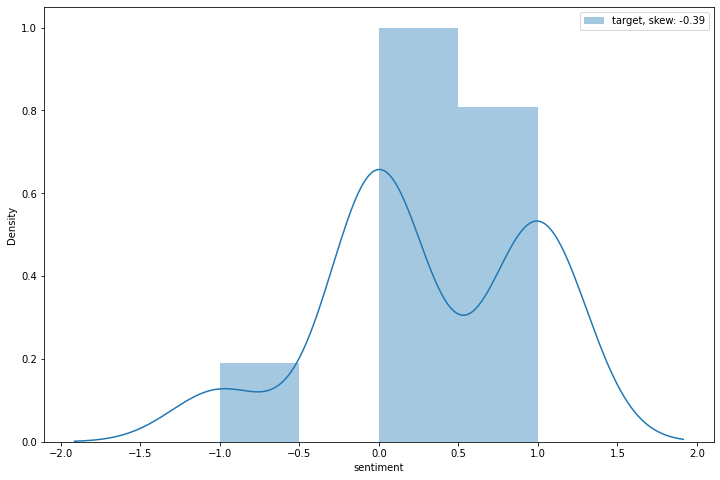

In [38]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [39]:
dataset_label.value_counts()

 0.0    21
 1.0    17
-1.0     4
Name: sentiment, dtype: int64

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
from sklearn.metrics import recall_score

In [43]:
from sklearn.metrics import f1_score

In [44]:
from sklearn.metrics import precision_score

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature,dataset_label, test_size = 0.3, random_state=42)

In [47]:
 from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
Tfidf_Vectorizer = TfidfVectorizer()

In [49]:
from sklearn.naive_bayes import MultinomialNB

In [50]:
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    #('vect', CountVectorizer()),
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [51]:
parameters_nb = {
                'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
                #'tfidf__use_idf': (True, False),
                'model__alpha': (0, 1, 1e-2, 1e-3)
}

In [52]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [53]:
classifier_nb.fit(train_x, train_label.ravel())

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0, 1, 0.01, 0.001),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [54]:
y_pred_nb_train = classifier_nb.predict(train_x)
accuracy_nb_train = accuracy_score(train_label, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_x)
accuracy_nb_test = accuracy_score(test_label, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  0.896551724137931
Accuracy Test set:  0.5384615384615384


In [55]:
recall_nb_train = recall_score(train_label, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_label, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  0.896551724137931
Recall Test set:  0.5384615384615384


In [56]:
precision_nb_train = precision_score(train_label, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_label, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  0.8439201451905626
Precision Test set:  0.6363636363636365


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
f1_nb_train = f1_score(train_label, y_pred_nb_train, average='weighted')
print("F1 Training set: ", f1_nb_train)

f1_nb_test = f1_score(test_label, y_pred_nb_test, average='weighted')
print("F1 Test set: ", f1_nb_test)

F1 Training set:  0.8656814449917898
F1 Test set:  0.47115384615384615


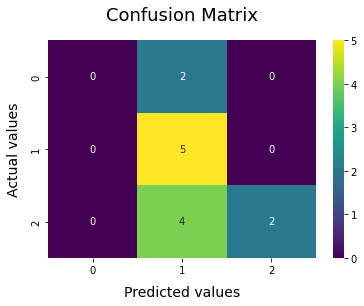

In [58]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [59]:
classifier_nb.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', MultinomialNB(alpha=1))])

In [60]:
for param_name in sorted(parameters_nb.keys()):
    print("%s: %r" % (param_name, classifier_nb.best_params_[param_name]))

model__alpha: 1
tfidf__ngram_range: (1, 1)
